In [1]:
import pandas as pd 

# Explotary Data Analytics

In [5]:
df =pd.read_csv("weather_forecasting_dataset.csv")
df

,date_time,temperature,humidity,wind_speed,wind_direction,pressure,precipitation,cloud_coverage,weather_condition,forecasted_weather
0,01-01-2012,8.90,88,4.7,63,1008.2,0.0,33,drizzle,drizzle
1,02-01-2012,6.70,78,4.5,129,1020.1,10.9,25,rain,rain
2,03-01-2012,9.45,64,2.3,309,1014.7,0.8,46,rain,drizzle
3,04-01-2012,8.90,92,4.7,192,1011.3,20.3,4,rain,rain
4,05-01-2012,5.85,57,6.1,306,1014.3,1.3,89,rain,sun
...,...,...,...,...,...,...,...,...,...,...
1456,27-12-2015,3.05,66,2.9,269,1020.5,8.6,41,rain,rain
1457,28-12-2015,3.35,75,1.3,119,1020.0,1.5,50,rain,rain
1458,29-12-2015,3.90,70,2.6,335,1004.3,0.0,55,fog,fog
1459,30-12-2015,2.30,77,3.4,181,1006.4,0.0,50,sun,sun


In [7]:
# Chekc summary 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date_time           1461 non-null   object 
 1   temperature         1461 non-null   float64
 2   humidity            1461 non-null   int64  
 3   wind_speed          1461 non-null   float64
 4   wind_direction      1461 non-null   int64  
 5   pressure            1461 non-null   float64
 6   precipitation       1461 non-null   float64
 7   cloud_coverage      1461 non-null   int64  
 8   weather_condition   1461 non-null   object 
 9   forecasted_weather  1461 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 114.3+ KB


In [26]:
# Check Missing Value
df.isnull().sum()

date_time             0
temperature           0
humidity              0
wind_speed            0
wind_direction        0
pressure              0
precipitation         0
cloud_coverage        0
weather_condition     0
forecasted_weather    0
dtype: int64

In [28]:
# Check for duplicate 
df.duplicated().sum()

0

In [35]:
# Check for data type
df.dtypes

date_time              object
temperature           float64
humidity                int64
wind_speed            float64
wind_direction          int64
pressure              float64
precipitation         float64
cloud_coverage          int64
weather_condition      object
forecasted_weather     object
dtype: object

In [47]:
df['date_time'] = pd.to_datetime(df['date_time'], dayfirst=True)


In [49]:
df.dtypes

date_time             datetime64[ns]
temperature                  float64
humidity                       int64
wind_speed                   float64
wind_direction                 int64
pressure                     float64
precipitation                float64
cloud_coverage                 int64
weather_condition             object
forecasted_weather            object
year                           int32
month                          int32
day                            int32
dtype: object

# Temperature Over Time

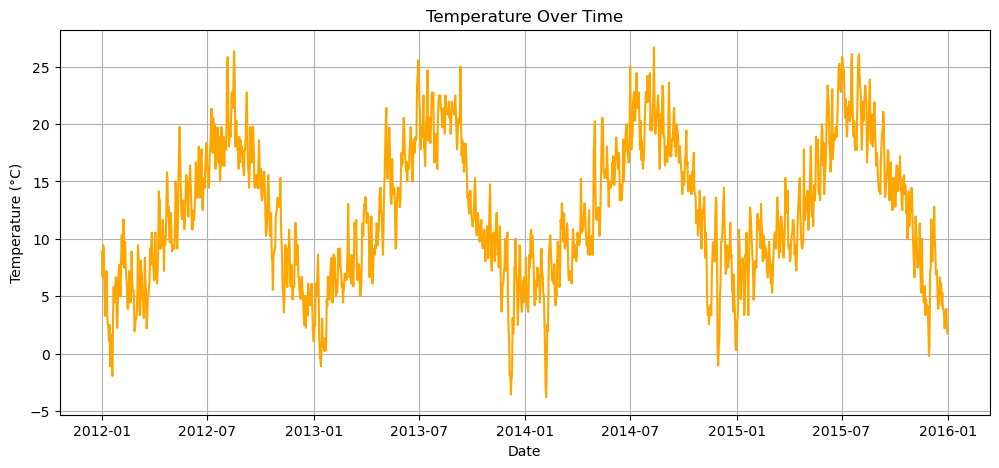

In [83]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(df['date_time'], df['temperature'], color='orange')
plt.title("Temperature Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()

# Weather Condition Count (Bar Plot)

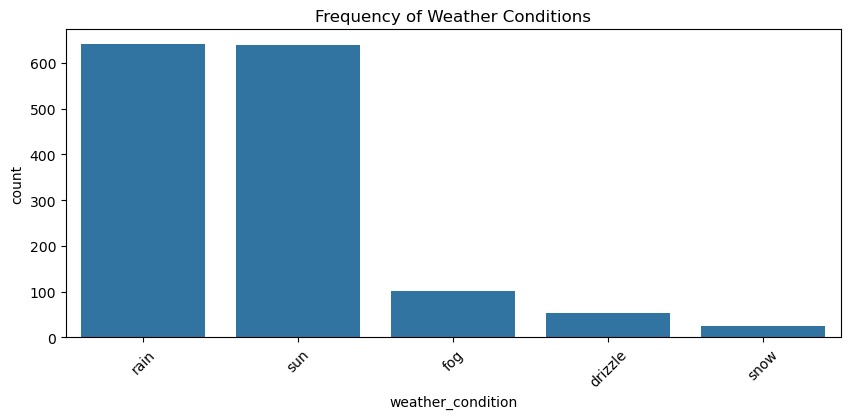

In [56]:
import seaborn as sns

plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='weather_condition', order=df['weather_condition'].value_counts().index)
plt.title("Frequency of Weather Conditions")
plt.xticks(rotation=45)
plt.show()


# Monthly Rainfall Trend

C:\Users\dell\AppData\Local\Temp\ipykernel_4268\1325157001.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='precipitation', data=monthly_rain, palette="Blues_d")


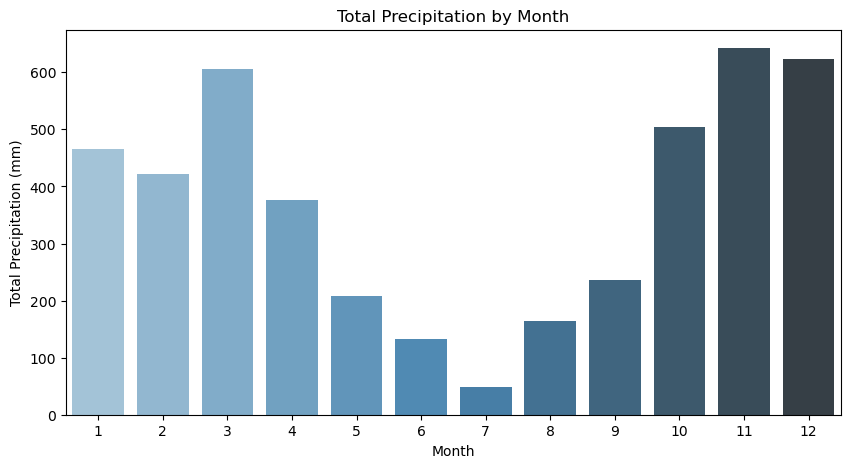

In [68]:
monthly_rain = df.groupby('month')['precipitation'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='month', y='precipitation', data=monthly_rain, palette="Blues_d")
plt.title("Total Precipitation by Month")
plt.xlabel("Month")
plt.ylabel("Total Precipitation (mm)")
plt.show()


# Correlation Heatmap

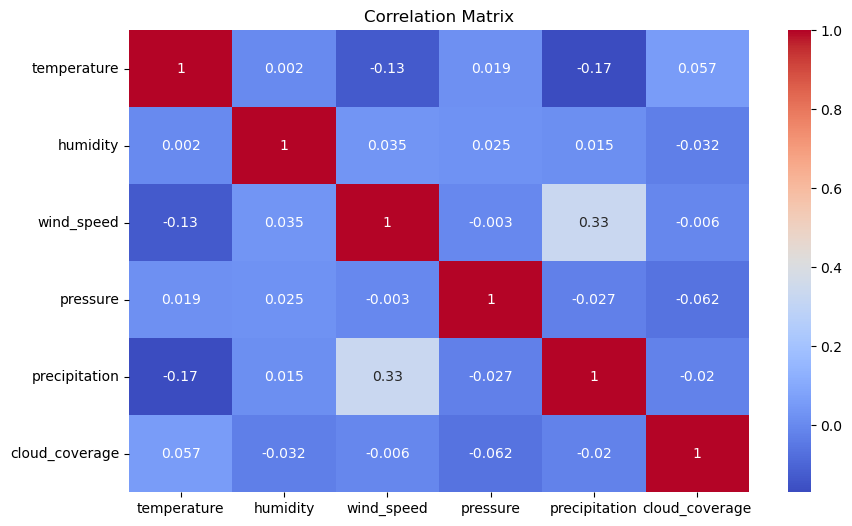

In [72]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['temperature', 'humidity', 'wind_speed', 'pressure', 'precipitation', 'cloud_coverage']].corr(), 
            annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


# Temperature by Weather Condition

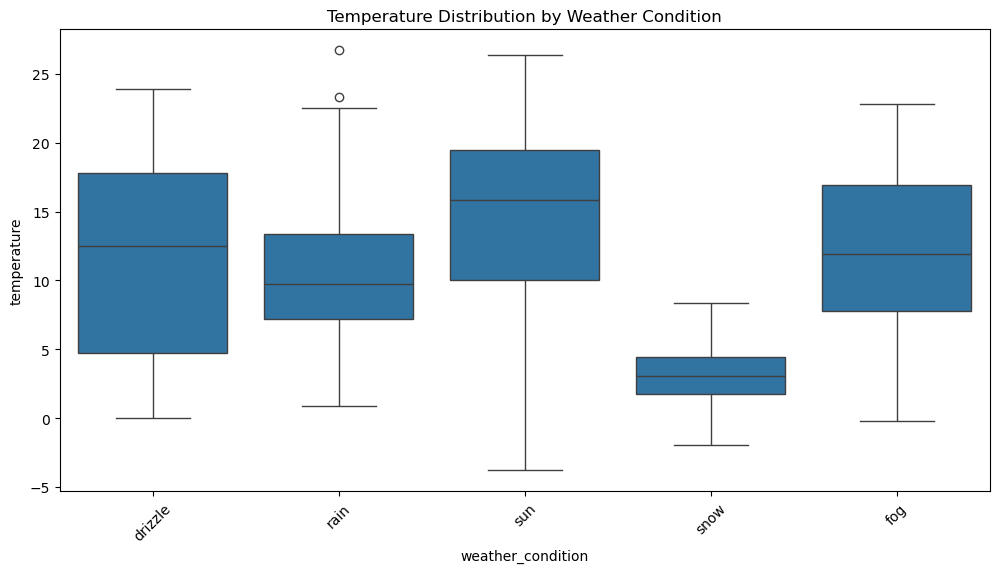

In [76]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='weather_condition', y='temperature')
plt.title("Temperature Distribution by Weather Condition")
plt.xticks(rotation=45)
plt.show()


In [105]:
plt.savefig("temperature_by_condition.png", dpi=300, bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

In [97]:
df.to_csv("cleaned_weather_data.csv", index=False)
print("Succesfully Saved")

Succesfully Saved
